## **Drawing images and shapes using OpenCV**

Firsty, let's import OpenCV and numpy and define our imshow function

## **OpenCV를 사용하여 이미지 및 모양 그리기**

OpenCV와 numpy를 가져와 imshow 함수를 정의

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Let's start off my making a blank square canvas

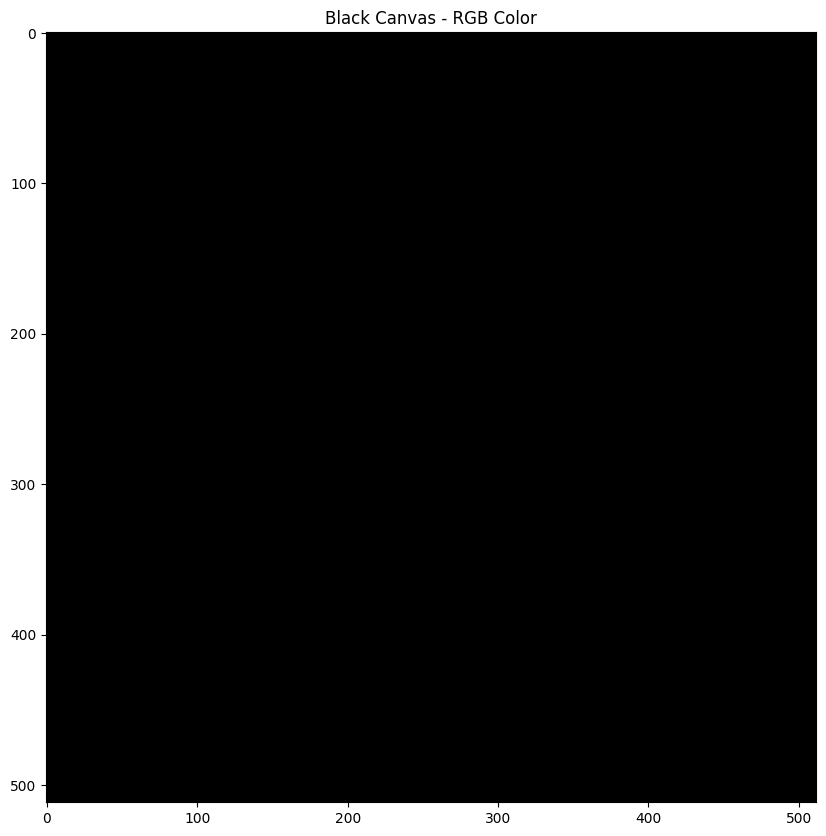

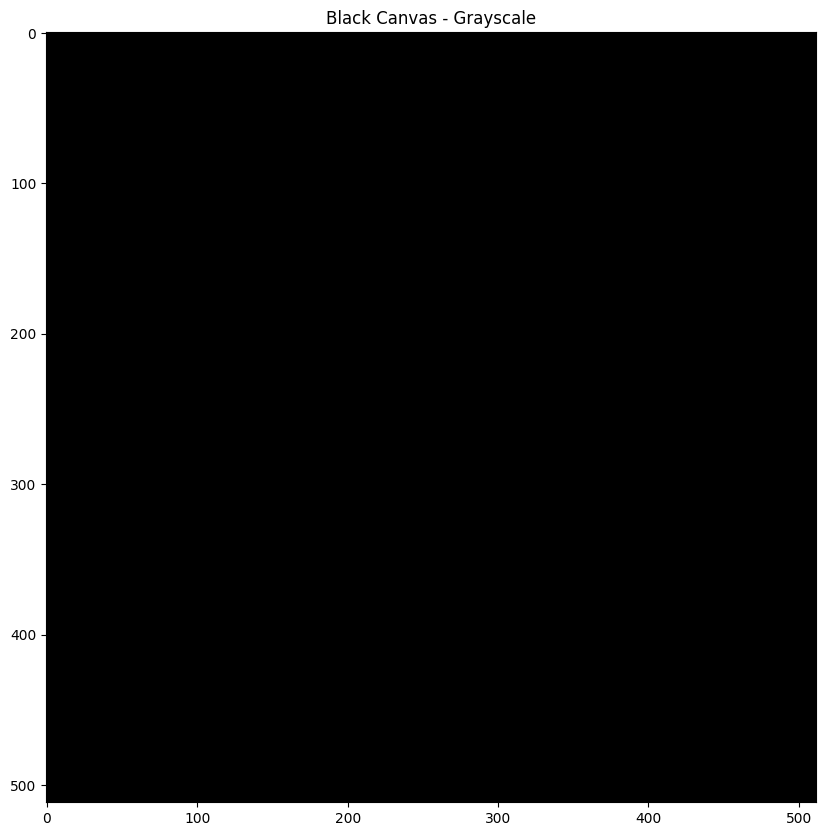

In [3]:
# Create a black image using numpy to create and array of black
image = np.zeros((512,512,3), np.uint8)

# Can we make this in black and white? grayscale
image_gray = np.zeros((512,512), np.uint8)

# Black would be the same as a greyscale or color image (same for white)
imshow("Black Canvas - RGB Color", image)
imshow("Black Canvas - Grayscale", image_gray)

### **Let's draw a line over our black square**

```cv2.line(image, starting cordinates, ending cordinates, color, thickness)```

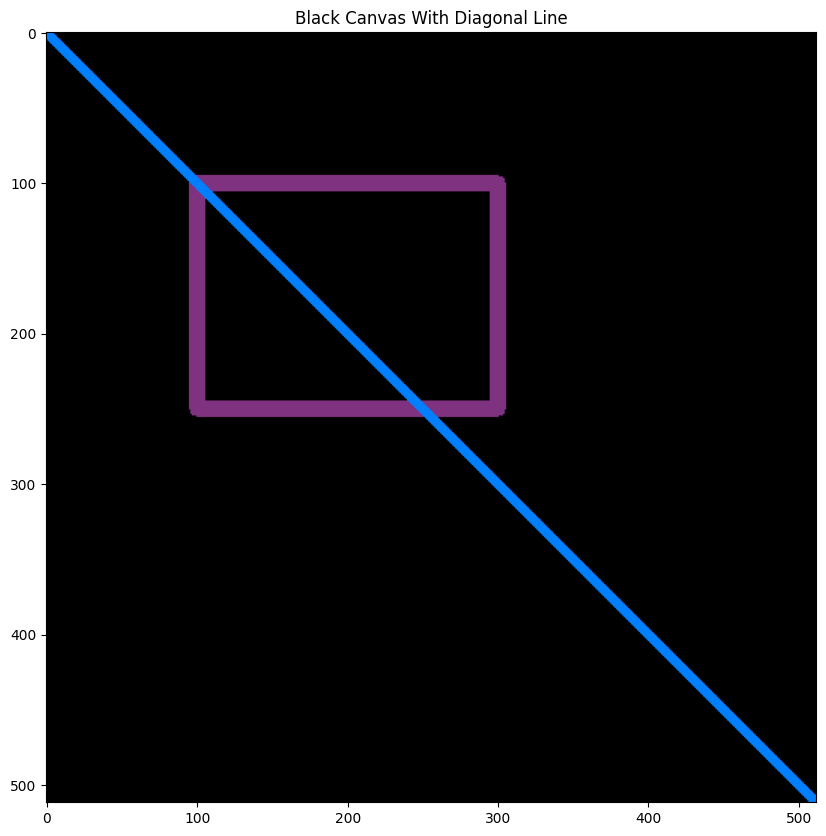

In [7]:
# Note this is an inplace operation, meaning it changes the input image
# Unlike many other OpenCV functions that return a new image leaving the input unaffected
# Remember our image was the black canvas
# 이 작업은 입력 이미지를 변경하는 인플레이스 작업입니다
# 입력이 영향을 받지 않은 채로 새 영상을 반환하는 다른 많은 OpenCV 기능과 달리
# 우리의 이미지는 검은 캔버스였다는 것을 기억하세요
cv2.line(image, (0,0), (511,511), (255,127,0), 5)

imshow("Black Canvas With Diagonal Line", image)

### **Drawing Rectangles**

```cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)```

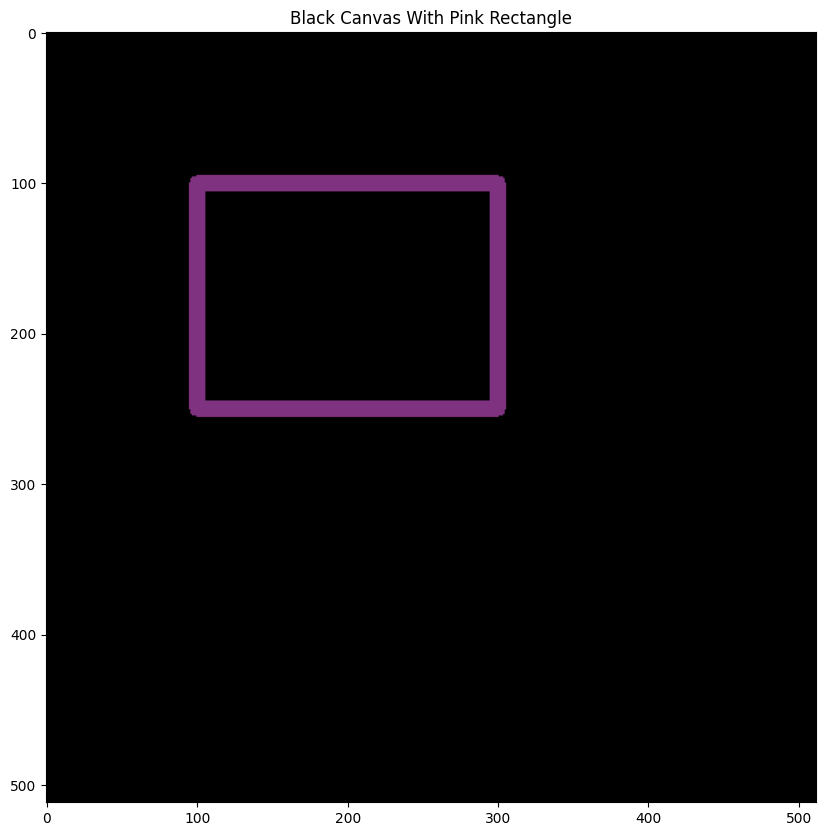

In [6]:
# Create our black canvas again because now it has a line in it
# image = np.zeros((512,512,3), np.uint8)

# Thickness - if positive. Negative thickness means that it is filled
cv2.rectangle(image, (100,100), (300,250), (127,50,127), 10)
imshow("Black Canvas With Pink Rectangle", image)

### **Now let's draw some cirlcles?**

```cv2.cirlce(image, center, radius, color, fill)```

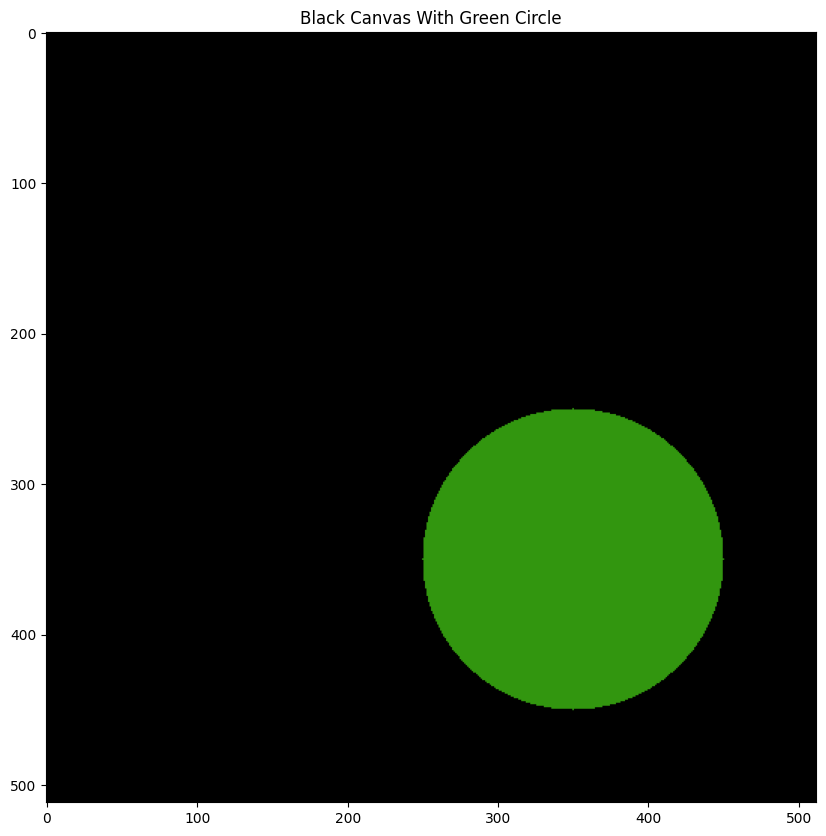

In [19]:
image = np.zeros((512,512,3), np.uint8)

cv2.circle(image, (350, 350), 100, (15,150,50), -1)
imshow("Black Canvas With Green Circle", image)

### **Polygons**

```cv2.polylines(image, points, Closed?, color, thickness)```

if Closed = True, we join the first and last points.

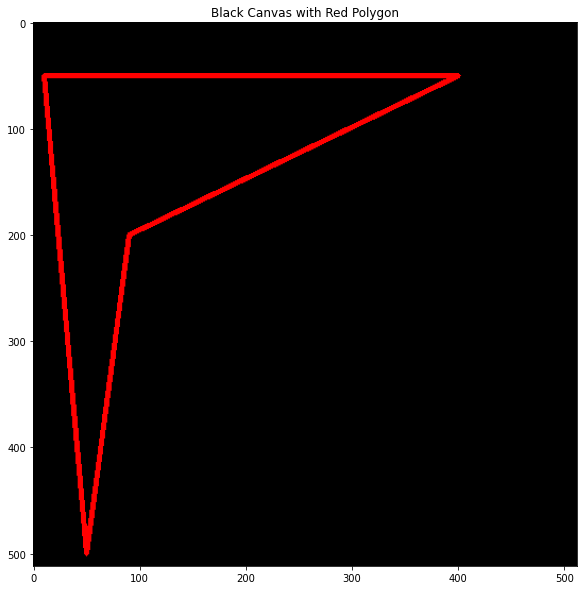

In [ ]:
image = np.zeros((512,512,3), np.uint8)

# Let's define four points
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)

# Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))

cv2.polylines(image, [pts], True, (0,0,255), 3)
imshow("Black Canvas with Red Polygon", image)

원래 배열 각 점의 모양:
(2,)
(2,)
(2,)
(2,)

reshape() 함수를 사용하여 변환된 배열 각 점의 모양:
(1, 2)
(1, 2)
(1, 2)
(1, 2)


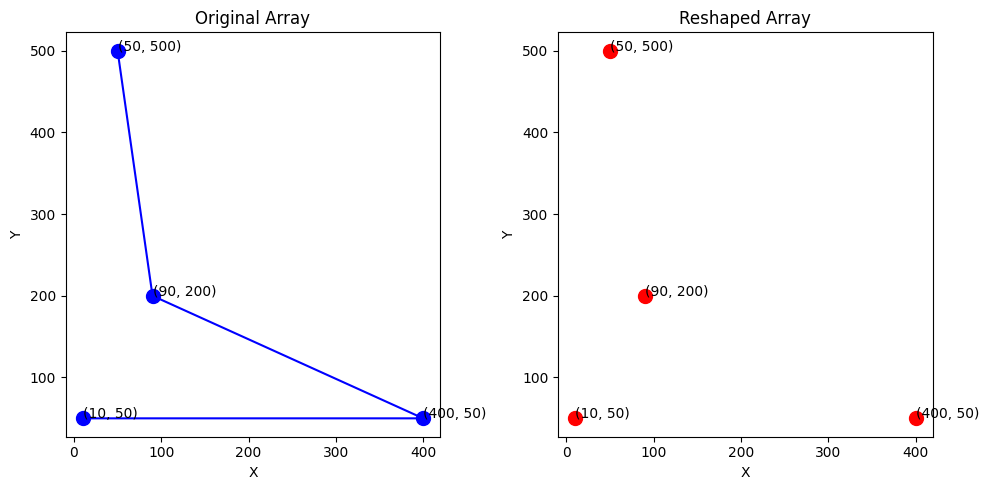

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 원래 배열
pts_original = np.array([[10, 50], [400, 50], [90, 200], [50, 500]])

# reshape() 함수를 사용하여 변환된 배열
pts_reshaped = pts_original.reshape((-1, 1, 2))

# 각 점의 모양 출력
print("원래 배열 각 점의 모양:")
for point in pts_original:
    print(point.shape)

print("\nreshape() 함수를 사용하여 변환된 배열 각 점의 모양:")
for point in pts_reshaped:
    print(point.shape)

# 그림 생성
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 원래 배열 플로팅
axs[0].plot(pts_original[:, 0], pts_original[:, 1], 'bo-', markersize=10)
for i in range(len(pts_original)):
    axs[0].text(pts_original[i, 0], pts_original[i, 1], f'({pts_original[i, 0]}, {pts_original[i, 1]})')
axs[0].set_title('Original Array')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# reshape() 함수를 사용하여 변환된 배열 플로팅
for i in range(len(pts_reshaped)):
    axs[1].plot(pts_reshaped[i][:, 0], pts_reshaped[i][:, 1], 'ro-', markersize=10)
    axs[1].text(pts_reshaped[i][0][0], pts_reshaped[i][0][1], f'({pts_reshaped[i][0][0]}, {pts_reshaped[i][0][1]})')
axs[1].set_title('Reshaped Array')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

plt.tight_layout()
plt.show()


**Note** cv2.polylines requires our data be shaped in this way:

In [23]:
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)
pts.shape

(4, 2)

In [24]:
pts = pts.reshape((-1,1,2))
pts.shape

(4, 1, 2)

### **And now for adding text with cv2.putText**

```cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)```

**Available Fonts**
- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

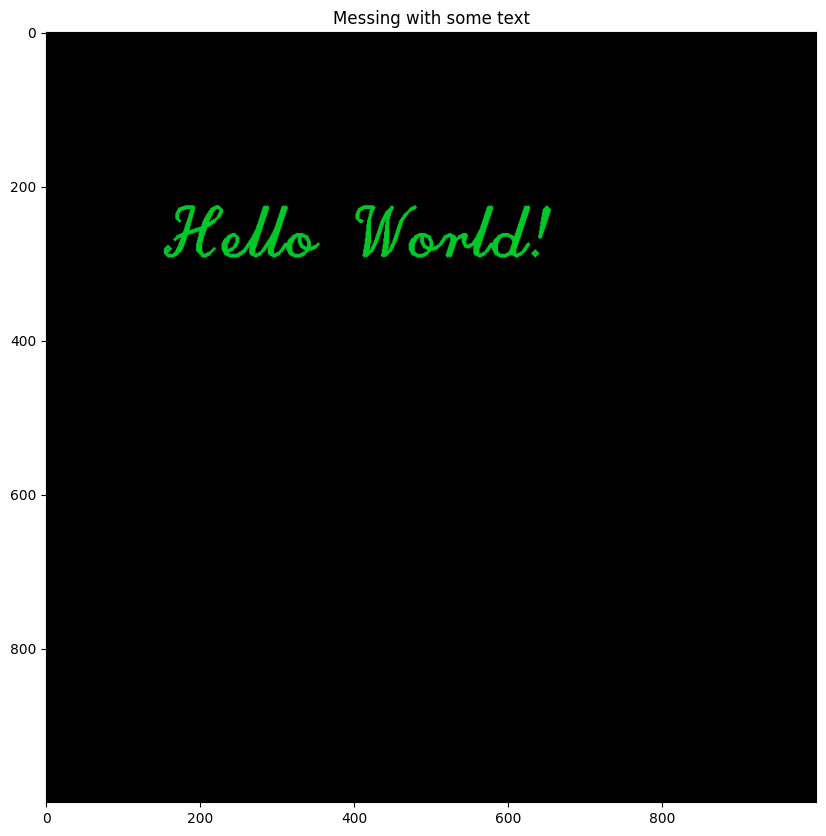

In [25]:
image = np.zeros((1000,1000,3), np.uint8)
ourString =  'Hello World!'
cv2.putText(image, ourString, (155,290), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 3, (40,200,0), 4)
imshow("Messing with some text", image)